<a href="https://colab.research.google.com/github/pikaern/fyp-deep-learning/blob/main/fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flask-ngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install midiutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54566 sha256=cc5e770ff114828f8cffa6b90b8cc9ad40b4438f553271de2f8bad616588542a
  Stored in directory: /root/.cache/pip/wheels/e3/97/cd/a677b61a76d575f373e2e10302f1d9106507fea6dd1320df03
Successfully built midiutil


In [ ]:
from flask import Flask,request,send_from_directory,render_template,send_file
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow.compat.v1 as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from collections import Counter
from midiutil import MIDIFile
from datetime import datetime

In [ ]:
pitch_to_MIDI = {
    "C8": 108,
    "B7": 107,
    "Bb7": 106,
    "A#7": 106,
    "A7": 105,
    "Ab7": 104,
    "G#7": 104,
    "G7": 103,
    "Gb7": 102,
    "F#7": 102,
    "F7": 101,
    "E7": 100,
    "Eb7": 99,
    "D#7": 99,
    "D7": 98,
    "Db7": 97,
    "C#7": 97,
    "C7": 96,
    "B6": 95,
    "Bb6": 94,
    "A#6": 94,
    "A6": 93,
    "Ab6": 92,
    "G#6": 92,
    "G6": 91,
    "Gb6": 90,
    "F#6": 90,
    "F6": 89,
    "E6": 88,
    "Eb6": 87,
    "D#6": 87,
    "D6": 86,
    "Db6": 85,
    "C#6": 85,
    "C6": 84,
    "B5": 83,
    "Bb5": 82,
    "A#5": 82,
    "A5": 81,
    "Ab5": 80,
    "G#5": 80,
    "G5": 79,
    "Gb5": 78,
    "F#5": 78,
    "F5": 77,
    "E5": 76,
    "Eb5": 75,
    "D#5": 75,
    "D5": 74,
    "Db5": 73,
    "C#5": 73,
    "C5": 72,
    "B4": 71,
    "Bb4": 70,
    "A#4": 70,
    "A4": 69,
    "Ab4": 68,
    "G#4": 68,
    "G4": 67,
    "Gb4": 66,
    "F#4": 66,
    "F4": 65,
    "E4": 64,
    "Eb4": 63,
    "D#4": 63,
    "D4": 62,
    "Db4": 61,
    "C#4": 61,
    "C4": 60,
    "B3": 59,
    "Bb3": 58,
    "A#3": 58,
    "A3": 57,
    "Ab3": 56,
    "G#3": 56,
    "G3": 55,
    "Gb3": 54,
    "F#3": 54,
    "F3": 53,
    "E3": 52,
    "Eb3": 51,
    "D#3": 51,
    "D3": 50,
    "Db3": 49,
    "C#3": 49,
    "C3": 48,
    "B2": 47,
    "Bb2": 46,
    "A#2": 46,
    "A2": 45,
    "Ab2": 44,
    "G#2": 44,
    "G2": 43,
    "Gb2": 42,
    "F#2": 42,
    "F2": 41,
    "E2": 40,
    "Eb2": 39,
    "D#2": 39,
    "D2": 38,
    "Db2": 37,
    "C#2": 37,
    "C2": 36,
    "B1": 35,
    "Bb1": 34,
    "A#1": 34,
    "A1": 33,
    "Ab1": 32,
    "G#1": 32,
    "G1": 31,
    "Gb1": 30,
    "F#1": 30,
    "F1": 29,
    "E1": 28,
    "Eb1": 27,
    "D#1": 27,
    "D1": 26,
    "Db1": 25,
    "C#1": 25,
    "C1": 24,
    "B0": 23,
    "Bb0": 22,
    "A#0": 22,
    "A0": 21
}

In [ ]:
def getNumberedNotation(key):
  notation_dict = {
      'AbM' : {
          'Ab3': [1, 'lower'], 
          'Bb3': [2,'lower'],
          'C4' : [3, 'lower'], 
          'Db4' : [4, 'lower'],
          'Eb4' : [5, 'lower'],
          'F4' : [6, 'lower'],
          'G4' : [7, 'lower'],
          'Ab4': [1, 'middle'], 
          'Bb4': [2,'middle'],
          'C5' : [3, 'middle'], 
          'Db5' : [4, 'middle'],
          'Eb5' : [5, 'middle'],
          'F5' : [6, 'middle'],
          'G5' : [7, 'middle'],
          'Ab5': [1, 'upper'], 
          'Bb5': [2,'upper'],
          'C6' : [3, 'upper'], 
          'Db6' : [4, 'upper'],
          'Eb6' : [5, 'upper'],
          'F6' : [6, 'upper'],
          'G6' : [7, 'upper'],
      },
      'AM' : {
          'A3' : [1, 'lower'], 
          'B3' : [2, 'lower'],
          'C#4': [3, 'lower'], 
          'D4' : [4, 'lower'],
          'E4' : [5, 'lower'],
          'F#4': [6, 'lower'],
          'G#4': [7, 'lower'],
          'A4' : [1, 'middle'], 
          'B4' : [2, 'middle'],
          'C#5': [3, 'middle'], 
          'D5' : [4, 'middle'],
          'E5' : [5, 'middle'],
          'F#5': [6, 'middle'],
          'G#5': [7, 'middle'],
          'A5' : [1, 'upper'], 
          'B5' : [2, 'upper'],
          'C#6': [3, 'upper'], 
          'D6' : [4, 'upper'],
          'E6' : [5, 'upper'],
          'F#6': [6, 'upper'],
          'G#6': [7, 'upper'],
      },
      'BbM' : {
          'Bb3' : [1, 'lower'], 
          'C4' : [2, 'lower'],
          'D4': [3, 'lower'], 
          'Eb4' : [4, 'lower'],
          'F4' : [5, 'lower'],
          'G4': [6, 'lower'],
          'A4': [7, 'lower'],
          'Bb4' : [1, 'middle'], 
          'C5' : [2, 'middle'],
          'D5': [3, 'middle'], 
          'Eb5' : [4, 'middle'],
          'F5' : [5, 'middle'],
          'G5': [6, 'middle'],
          'A5': [7, 'middle'],
          'Bb5' : [1, 'upper'], 
          'C6' : [2, 'upper'],
          'D6': [3, 'upper'], 
          'Eb6' : [4, 'upper'],
          'F6' : [5, 'upper'],
          'G6': [6, 'upper'],
          'A6': [7, 'upper'],
      },
      'BM' : {
          'B3' : [1, 'lower'], 
          'C#4' : [2, 'lower'],
          'D#4': [3, 'lower'], 
          'E4' : [4, 'lower'],
          'F#4' : [5, 'lower'],
          'G#4': [6, 'lower'],
          'A#4': [7, 'lower'],
          'B4' : [1, 'middle'], 
          'C#5' : [2, 'middle'],
          'D#5': [3, 'middle'], 
          'E5' : [4, 'middle'],
          'F#5' : [5, 'middle'],
          'G#5': [6, 'middle'],
          'A#5': [7, 'middle'],
          'B5' : [1, 'upper'], 
          'C#6' : [2, 'upper'],
          'D#6': [3, 'upper'], 
          'E6' : [4, 'upper'],
          'F#6' : [5, 'upper'],
          'G#6': [6, 'upper'],
          'A#6': [7, 'upper'],
      },
      'CM' : {
          'C3' : [1, 'lower'], 
          'D3' : [2, 'lower'],
          'E3': [3, 'lower'], 
          'F3' : [4, 'lower'],
          'G3' : [5, 'lower'],
          'A3': [6, 'lower'],
          'B3': [7, 'lower'],
          'C4' : [1, 'middle'], 
          'D4' : [2, 'middle'],
          'E4': [3, 'middle'], 
          'F4' : [4, 'middle'],
          'G4' : [5, 'middle'],
          'A4': [6, 'middle'],
          'B4': [7, 'middle'],
          'C5' : [1, 'upper'], 
          'D5' : [2, 'upper'],
          'E5': [3, 'upper'], 
          'F5' : [4, 'upper'],
          'G5' : [5, 'upper'],
          'A5': [6, 'upper'],
          'B5': [7, 'upper'],
      },
      'C#M' : {
          'C#3' : [1, 'lower'], 
          'D#3' : [2, 'lower'],
          'E#3': [3, 'lower'], 
          'F#3' : [4, 'lower'],
          'G#3' : [5, 'lower'],
          'A#3': [6, 'lower'],
          'B#3': [7, 'lower'],
          'C#4' : [1, 'middle'], 
          'D#4' : [2, 'middle'],
          'E#4': [3, 'middle'], 
          'F#4' : [4, 'middle'],
          'G#4' : [5, 'middle'],
          'A#4': [6, 'middle'],
          'B#4': [7, 'middle'],
          'C#5' : [1, 'upper'], 
          'D#5' : [2, 'upper'],
          'E#5': [3, 'upper'], 
          'F#5' : [4, 'upper'],
          'G#5' : [5, 'upper'],
          'A#5': [6, 'upper'],
          'B#5': [7, 'upper'],
      },
      'DbM' : {
          'Db3' : [1, 'lower'], 
          'Eb3' : [2, 'lower'],
          'F3': [3, 'lower'], 
          'Gb3' : [4, 'lower'],
          'Ab3' : [5, 'lower'],
          'Bb3': [6, 'lower'],
          'C4': [7, 'lower'],
          'Db4' : [1, 'middle'], 
          'Eb4' : [2, 'middle'],
          'F4': [3, 'middle'], 
          'Gb4' : [4, 'middle'],
          'Ab4' : [5, 'middle'],
          'Bb4': [6, 'middle'],
          'C5': [7, 'middle'],
          'Db5' : [1, 'upper'], 
          'Eb5' : [2, 'upper'],
          'F5': [3, 'upper'], 
          'Gb5' : [4, 'upper'],
          'Ab5' : [5, 'upper'],
          'Bb5': [6, 'upper'],
          'C6': [7, 'upper'],
      },
      'DM' : {
          'D3' : [1, 'lower'], 
          'E3' : [2, 'lower'],
          'F#3': [3, 'lower'], 
          'G3' : [4, 'lower'],
          'A3' : [5, 'lower'],
          'B3': [6, 'lower'],
          'C#4': [7, 'lower'],
          'D4' : [1, 'middle'], 
          'E4' : [2, 'middle'],
          'F#4': [3, 'middle'], 
          'G4' : [4, 'middle'],
          'A4' : [5, 'middle'],
          'B4': [6, 'middle'],
          'C#5': [7, 'middle'],
          'D5' : [1, 'upper'], 
          'E5' : [2, 'upper'],
          'F#5': [3, 'upper'], 
          'G5' : [4, 'upper'],
          'A5' : [5, 'upper'],
          'B5': [6, 'upper'],
          'C#6': [7, 'upper'],
      },
      'EbM' : {
          'Eb3' : [1, 'lower'], 
          'F3' : [2, 'lower'],
          'G3': [3, 'lower'], 
          'Ab3' : [4, 'lower'],
          'Bb3' : [5, 'lower'],
          'C4': [6, 'lower'],
          'D4': [7, 'lower'],
          'Eb4' : [1, 'middle'], 
          'F4' : [2, 'middle'],
          'G4': [3, 'middle'], 
          'Ab4' : [4, 'middle'],
          'Bb4' : [5, 'middle'],
          'C5': [6, 'middle'],
          'D5': [7, 'middle'],
          'Eb5' : [1, 'upper'], 
          'F5' : [2, 'upper'],
          'G5': [3, 'upper'], 
          'Ab5' : [4, 'upper'],
          'Bb5' : [5, 'upper'],
          'C6': [6, 'upper'],
          'D6': [7, 'upper'],
      },
      'EM' : {
          'E3' : [1, 'lower'], 
          'F#3' : [2, 'lower'],
          'G#3': [3, 'lower'], 
          'A3' : [4, 'lower'],
          'B3' : [5, 'lower'],
          'C#4': [6, 'lower'],
          'D#4': [7, 'lower'],
          'E4' : [1, 'middle'], 
          'F#4' : [2, 'middle'],
          'G#4': [3, 'middle'], 
          'A4' : [4, 'middle'],
          'B4' : [5, 'middle'],
          'C#5': [6, 'middle'],
          'D#5': [7, 'middle'],
          'E5' : [1, 'upper'], 
          'F#5' : [2, 'upper'],
          'G#5': [3, 'upper'], 
          'A5' : [4, 'upper'],
          'B5' : [5, 'upper'],
          'C#6': [6, 'upper'],
          'D#6': [7, 'upper'],
      },
      'FM' : {
          'F3' : [1, 'lower'], 
          'G3' : [2, 'lower'],
          'A3': [3, 'lower'], 
          'Bb3' : [4, 'lower'],
          'C4' : [5, 'lower'],
          'D4': [6, 'lower'],
          'E4': [7, 'lower'],
          'F4' : [1, 'middle'], 
          'G4' : [2, 'middle'],
          'A4': [3, 'middle'], 
          'Bb4' : [4, 'middle'],
          'C5' : [5, 'middle'],
          'D5': [6, 'middle'],
          'E5': [7, 'middle'],
          'F5' : [1, 'upper'], 
          'G5' : [2, 'upper'],
          'A5': [3, 'upper'], 
          'Bb5' : [4, 'upper'],
          'C6' : [5, 'upper'],
          'D6': [6, 'upper'],
          'E6': [7, 'upper'],
      },
      'F#M' : {
          'F#3' : [1, 'lower'], 
          'G#3' : [2, 'lower'],
          'A#3': [3, 'lower'], 
          'B3' : [4, 'lower'],
          'C#4' : [5, 'lower'],
          'D#4': [6, 'lower'],
          'E#4': [7, 'lower'],
          'F#4' : [1, 'middle'], 
          'G#4' : [2, 'middle'],
          'A#4': [3, 'middle'], 
          'B4' : [4, 'middle'],
          'C#5' : [5, 'middle'],
          'D#5': [6, 'middle'],
          'E#5': [7, 'middle'],
          'F#5' : [1, 'upper'], 
          'G#5' : [2, 'upper'],
          'A#5': [3, 'upper'], 
          'B5' : [4, 'upper'],
          'C#6' : [5, 'upper'],
          'D#6': [6, 'upper'],
          'E#6': [7, 'upper'],
      },
      'GbM' : {
          'Gb3' : [1, 'lower'], 
          'Ab3' : [2, 'lower'],
          'Bb3': [3, 'lower'], 
          'Cb4' : [4, 'lower'],
          'Db4' : [5, 'lower'],
          'Eb4': [6, 'lower'],
          'F4': [7, 'lower'],
          'Gb4' : [1, 'middle'], 
          'Ab4' : [2, 'middle'],
          'Bb4': [3, 'middle'], 
          'Cb5' : [4, 'middle'],
          'Db5' : [5, 'middle'],
          'Eb5': [6, 'middle'],
          'F5': [7, 'middle'],
          'Gb5' : [1, 'upper'], 
          'Ab5' : [2, 'upper'],
          'Bb5': [3, 'upper'], 
          'Cb6' : [4, 'upper'],
          'Db6' : [5, 'upper'],
          'Eb6': [6, 'upper'],
          'F6': [7, 'upper'],
      },
      'GM' : {
          'G3' : [1, 'lower'], 
          'A3' : [2, 'lower'],
          'B3':  [3, 'lower'], 
          'C4' : [4, 'lower'],
          'D4' : [5, 'lower'],
          'E4': [6, 'lower'],
          'F#4': [7, 'lower'],
          'G4' : [1, 'middle'], 
          'A4' : [2, 'middle'],
          'B4':  [3, 'middle'], 
          'C5' : [4, 'middle'],
          'D5' : [5, 'middle'],
          'E5': [6, 'middle'],
          'F#5': [7, 'middle'],
          'G5' : [1, 'upper'], 
          'A5' : [2, 'upper'],
          'B5':  [3, 'upper'], 
          'C6' : [4, 'upper'],
          'D6' : [5, 'upper'],
          'E6': [6, 'upper'],
          'F#6': [7, 'upper'],
      },

  }
  return notation_dict[key]

In [ ]:
def sparse_tensor_to_strs(sparse_tensor):
  indices= sparse_tensor[0][0]
  values = sparse_tensor[0][1]
  dense_shape = sparse_tensor[0][2]

  strs = [ [] for i in range(dense_shape[0]) ]
  
  string = []
  ptr = 0
  b = 0

  for idx in range(len(indices)):
      if indices[idx][0] != b:
          strs[b] = string
          string = []
          b = indices[idx][0]

      string.append(values[ptr])

      ptr = ptr + 1

  strs[b] = string

  return strs


In [ ]:
def find_staffline_rows(img, line_width, line_spacing):
    num_rows = img.shape[0]  # Image Height (number of rows)
    num_cols = img.shape[1]  # Image Width (number of columns)
    row_black_pixel_histogram = []
    staff_start_row = []
    staff_end_row = []
    # Determine number of black pixels in each row
    for i in range(num_rows):
        row = img[i]
        black_start = False
        
        num_black_pixels = 0
        for j in range(len(row)):
            if (row[j] == 0):
                num_black_pixels += 1
        if (black_start == False and num_black_pixels > 3):
            staff_start_row.append(i)
            black_start = True

        if (black_start == True and num_black_pixels == 0):
            staff_end_row.append(i)
            black_start = False


        row_black_pixel_histogram.append(num_black_pixels)

    plt.bar(np.arange(num_rows), row_black_pixel_histogram)
    plt.show()


    return staff_start_row,staff_end_row

In [ ]:
def find_staffline_rows(img):
    num_rows = img.shape[0]  # Image Height (number of rows)
    num_cols = img.shape[1]  # Image Width (number of columns)
    row_black_pixel_histogram = []
    staff_start_row = []
    staff_end_row = []
    black_start = False
    checkCount = 0
    # Determine number of black pixels in each row
    for i in range(num_rows):
        row = img[i]
        num_black_pixels = 0
        for j in range(len(row)):
            if (row[j] == 0):
                num_black_pixels += 1

        if (black_start == False and num_black_pixels > 5):
            staff_start_row.append(i)
            black_start = True

        if (black_start == True and num_black_pixels == 0):
            checkCount+=1
            if(checkCount>10):
              staff_end_row.append(i)
              black_start = False
              checkCount = 0
            
        row_black_pixel_histogram.append(num_black_pixels)

    plt.bar(np.arange(num_rows), row_black_pixel_histogram)
    plt.show()
    return staff_start_row,staff_end_row

In [ ]:
def normalize(image):
  return (255. - image)/255.

In [ ]:
def resize(image, height):
  width = int(float(height * image.shape[1]) / image.shape[0])
  sample_img = cv2.resize(image, (width, height))
  return sample_img

In [ ]:
app = Flask(__name__, static_url_path='')

In [ ]:
tf.disable_v2_behavior()

In [ ]:
voc_file = "vocabulary_semantic.txt"
model = "semantic_model.meta"

In [ ]:
# tf.reset_default_graph()
tf.compat.v1.reset_default_graph
sess = tf.compat.v1.InteractiveSession()
# Read the dictionary
dict_file = open(voc_file,'r')
dict_list = dict_file.read().splitlines()
int2word = dict()
for word in dict_list:
  word_idx = len(int2word)
  int2word[word_idx] = word
dict_file.close()

In [ ]:
# Restore weights
# saver = tf.compat.v1.train.import_meta_graph(model)
tf.compat.v1.disable_eager_execution()
saver = tf.compat.v1.train.import_meta_graph(model)
saver.restore(sess,model[:-5])

'model_variables' collection should be of type 'byte_list', but instead is of type 'node_list'.


In [ ]:
graph = tf.compat.v1.get_default_graph()

input = graph.get_tensor_by_name("model_input:0")
seq_len = graph.get_tensor_by_name("seq_lengths:0")
rnn_keep_prob = graph.get_tensor_by_name("keep_prob:0")
height_tensor = graph.get_tensor_by_name("input_height:0")
width_reduction_tensor = graph.get_tensor_by_name("width_reduction:0")
logits = tf.get_collection("logits")[0]

In [ ]:
# Constants that are saved inside the model itself
WIDTH_REDUCTION, HEIGHT = sess.run([width_reduction_tensor, height_tensor])

decoded, _ = tf.nn.ctc_greedy_decoder(logits, seq_len)


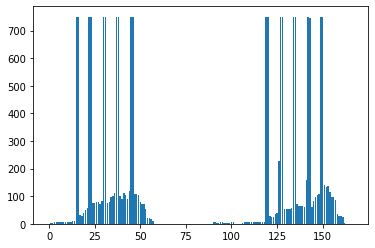

starting staff [3, 91]
ending staff [68]


In [ ]:
img = cv2.imread('multilines.png', 0)

# ============ Noise Removal ============

img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)

# ============ Binarization ============

# Global Thresholding
# retval, img = cv2.threshold(img,210,255,cv2.THRESH_BINARY)

# Otsu's Thresholding
retval, img = cv2.threshold(img, 210, 225, cv2.THRESH_BINARY)


# # Find starting point and ending point of staffline 
staff_start, staff_end = find_staffline_rows(img)
print("starting staff",staff_start)
print("ending staff", staff_end)

In [ ]:


resized_image = Image.open('multilines.png')
array_image = []
partition =[]
if len(staff_start) > 1:
  for i in range(len(staff_start)):
      if(i<len(staff_end)):
        partition = resized_image.crop((0, staff_start[i], resized_image.size[0], staff_end[i]))
      else:
        partition = resized_image.crop((0, staff_start[i], resized_image.size[0], resized_image.size[1]))
      partition.save('randomagain'+str(i)+'.png')
      array_image.append('randomagain'+str(i)+'.png')
else:
  array_image.append('multilines.png')
array_of_notes = []

for i in array_image:
  image = Image.open(i).convert('L') #convert to grayscale 
  image = np.array(image)

  image=resize(image, HEIGHT)

  image = normalize(image)
  image = np.asarray(image).reshape(1,image.shape[0],image.shape[1],1)
  seq_lengths = [ image.shape[2] / WIDTH_REDUCTION ]

  prediction = sess.run(decoded,
                              feed_dict={
                                  input: image,
                                  seq_len: seq_lengths,
                                  rnn_keep_prob: 1.0,
                              })
  str_predictions = sparse_tensor_to_strs(prediction)
  for w in str_predictions[0]:
    array_of_notes.append(int2word[w])

print(array_of_notes)
track    = 0
channel  = 0
time     = 0    # In beats
duration = 1    # In beats
tempo    = 60   # In BPM
volume   = 100  # 0-127, as per the MIDI standard

MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                      # automatically)
MyMIDI.addTempo(track, time, tempo)

isSetKey = False
notes = ''
startingX = 10
startingY = 10
im  =  Image.new("RGB",(350,250), (255,255,255))
draw  =  ImageDraw.Draw(im)
fonttype = ImageFont.truetype("OpenSans-Bold.ttf",size=12)
key = 'CM'
midi_result = ''
translated_result = ''
print(fonttype.getsize("."))

for i in array_of_notes:
  if "keySignature" in i:
    key = i[13:]
    break

drawKey=''
if(len(key)==2):
  drawKey = key[0]
else:
  drawKey = key[0:2]
  isSetKey = True
  
notes = getNumberedNotation(key)
draw.text((startingX,startingY),"1 = "+ drawKey,font=fonttype, fill=(0,0,0))
startingY +=20


for i in array_of_notes:
  if startingX + 20 > 350:
    startingX = 10
    startingY +=50
  
  if "note" in i:
    octave = 'middle'
    drawNote = ''
    midiNote = 1
    duration =1
    lowerOctaveSpacing = 15
    if not i[6].isdigit():
        drawNote = notes[i[5:8]][0]
        octave = notes[i[5:8]][1]
        midiNote = pitch_to_MIDI[i[5:8]]
    else:
        drawNote = notes[i[5:7]][0]
        octave = notes[i[5:7]][1]
        midiNote = pitch_to_MIDI[i[5:7]]
    draw.text((startingX,startingY+5), str(drawNote),font=fonttype, fill=(0,0,0))

    splitString = i.split('_', 1)
    timing = splitString[1]
    print(timing)
    if timing == 'quarter':
      duration = 1
      if octave == 'lower':
        draw.text((startingX+1,startingY+10), '.',font=fonttype, fill=(0,0,0))
      elif octave == 'upper':
        draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
      startingX+=20

    if timing == 'eighth':
      duration = 0.5
      if octave == 'lower':
        draw.text((startingX+1,startingY+15), '.',font=fonttype, fill=(0,0,0))
      elif octave == 'upper':
        draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
      shape= [(startingX-1, startingY + 20), (startingX+9, startingY+20)]
      draw.line(shape, fill =(0,0,0), width = 0)
      startingX+=10

    if timing == 'sixteenth':
      duration = 0.25
      if octave == 'lower':
        draw.text((startingX+1,startingY+ 18), '.',font=fonttype, fill=(0,0,0))
      elif octave == 'upper':
        draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
      shape_upper= [(startingX-1, startingY + 25), (startingX+9, startingY+25)]
      shape_lower= [(startingX-1, startingY + 20), (startingX+9, startingY+20)]
      draw.line(shape_upper, fill =(0,0,0), width = 0)
      draw.line(shape_lower, fill =(0,0,0), width = 0)
      startingX+=10

    if timing == 'half':
      duration = 2
      if octave == 'lower':
        draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
      elif octave == 'upper':
        draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
      
      shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
      draw.line(shape, fill =(0,0,0), width = 0)
      startingX+=40
    
    if timing == 'half.':
      duration = 3
      if octave == 'lower':
        draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
      elif octave == 'upper':
        draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
      
      first_shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
      second_shape= [(startingX + 37, startingY + 13), (startingX+46, startingY+13)]
      draw.line(first_shape, fill =(0,0,0), width = 0)
      draw.line(second_shape, fill =(0,0,0), width = 0)
      startingX+=60

    if timing == 'whole':
      duration = 4
      if octave == 'lower':
        draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
      elif octave == 'upper':
        draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
      
      first_shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
      second_shape= [(startingX + 37, startingY + 13), (startingX+46, startingY+13)]
      third_shape= [(startingX + 56, startingY + 13), (startingX+65, startingY+13)]
      draw.line(first_shape, fill =(0,0,0), width = 0)
      draw.line(second_shape, fill =(0,0,0), width = 0)
      draw.line(third_shape, fill =(0,0,0), width = 0)
      startingX+=80
    
    MyMIDI.addNote(track, channel, midiNote, time, duration, volume)
    time +=duration

  if "rest" in i:
    splitString = i.split('-', 1)
    timing = splitString[1]
    if timing == 'quarter':
      draw.text((startingX,startingY+5), str('0'),font=fonttype, fill=(0,0,0))
      duration = 1
      time +=duration
      startingX+=20
    
  if "barline" in i:
    shape= [(startingX, startingY), (startingX, startingY + 25)]
    draw.line(shape, fill =(0,0,0), width = 0)
    startingX+=15

    
im.save('random.png')
translated_result = 'random.png'

curr_dt = datetime.now()
timestamp = int(round(curr_dt.timestamp()))

with open("midioutput_"+str(timestamp)+".mid", "wb") as output_file:
    MyMIDI.writeFile(output_file)
    midi_result = output_file

    # return send_file(translated_result)

['clef-G2', 'timeSignature-6/4', 'note-E4_quarter', 'note-D4_quarter', 'note-C4_quarter', 'note-D4_quarter', 'barline', 'note-E4_quarter', 'note-E4_quarter', 'note-E4_quarter', 'rest-quarter', 'barline', 'note-D4_quarter', 'note-D4_quarter', 'note-D4_quarter', 'rest-quarter', 'barline', 'note-E4_quarter', 'note-G4_quarter', 'note-G4_quarter', 'rest-quarter', 'barline', 'clef-G2', 'timeSignature-4/4', 'note-E4_quarter', 'note-D4_quarter', 'note-C4_quarter', 'note-D4_quarter', 'barline', 'note-E4_quarter', 'note-E4_quarter', 'note-E4_quarter', 'note-E4_quarter', 'barline', 'note-D4_quarter', 'note-D4_quarter', 'note-E4_quarter', 'note-D4_quarter', 'barline', 'note-C4_half.', 'note-D4_quarter', 'barline']
(3, 13)
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
quarter
half.
quarter


In [ ]:
@app.route('/translate', methods = ['GET', 'POST'])
def translate():
  if request.method == 'POST':
    f = request.files['image']

    # ============ Read Image ============

    img = cv2.imread(f, 0)

    # ============ Noise Removal ============

    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)

    # ============ Binarization ============

    # Global Thresholding
    # retval, img = cv2.threshold(img,210,255,cv2.THRESH_BINARY)

    # Otsu's Thresholding
    retval, img = cv2.threshold(img, 210, 225, cv2.THRESH_BINARY)


    # # Find starting point and ending point of staffline 
    staff_start, staff_end = find_staffline_rows(img)
    print("starting staff",staff_start)
    print("ending staff", staff_end)

    resized_image = Image.open('multilines.png')
    array_image = []
    partition =[]
    if len(staff_start) > 1:
      for i in range(len(staff_start)):
          if(i<len(staff_end)):
            partition = resized_image.crop((0, staff_start[i], resized_image.size[0], staff_end[i]))
          else:
            partition = resized_image.crop((0, staff_start[i], resized_image.size[0], resized_image.size[1]))
          partition.save('randomagain'+str(i)+'.png')
          array_image.append('randomagain'+str(i)+'.png')
    else:
      array_image.append('multilines.png')
    array_of_notes = []

    for i in array_image:
      image = Image.open(i).convert('L') #convert to grayscale 
      image = np.array(image)

      image=resize(image, HEIGHT)

      image = normalize(image)
      image = np.asarray(image).reshape(1,image.shape[0],image.shape[1],1)
      seq_lengths = [ image.shape[2] / WIDTH_REDUCTION ]

      prediction = sess.run(decoded,
                                  feed_dict={
                                      input: image,
                                      seq_len: seq_lengths,
                                      rnn_keep_prob: 1.0,
                                  })
      str_predictions = sparse_tensor_to_strs(prediction)
      for w in str_predictions[0]:
        array_of_notes.append(int2word[w])

    print(array_of_notes)
    track    = 0
    channel  = 0
    time     = 0    # In beats
    duration = 1    # In beats
    tempo    = 60   # In BPM
    volume   = 100  # 0-127, as per the MIDI standard

    MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                          # automatically)
    MyMIDI.addTempo(track, time, tempo)

    isSetKey = False
    notes = ''
    startingX = 10
    startingY = 10
    im  =  Image.new("RGB",(350,250), (255,255,255))
    draw  =  ImageDraw.Draw(im)
    fonttype = ImageFont.truetype("OpenSans-Bold.ttf",size=12)
    key = 'CM'
    midi_result = ''
    translated_result = ''
    print(fonttype.getsize("."))

    for i in array_of_notes:
      if "keySignature" in i:
        key = i[13:]
        break

    drawKey=''
    if(len(key)==2):
      drawKey = key[0]
    else:
      drawKey = key[0:2]
      isSetKey = True
      
    notes = getNumberedNotation(key)
    draw.text((startingX,startingY),"1 = "+ drawKey,font=fonttype, fill=(0,0,0))
    startingY +=20


    for i in array_of_notes:
      if startingX + 20 > 350:
        startingX = 10
        startingY +=50
      
      if "note" in i:
        octave = 'middle'
        drawNote = ''
        midiNote = 1
        duration =1
        lowerOctaveSpacing = 15
        if not i[6].isdigit():
            drawNote = notes[i[5:8]][0]
            octave = notes[i[5:8]][1]
            midiNote = pitch_to_MIDI[i[5:8]]
        else:
            drawNote = notes[i[5:7]][0]
            octave = notes[i[5:7]][1]
            midiNote = pitch_to_MIDI[i[5:7]]
        draw.text((startingX,startingY+5), str(drawNote),font=fonttype, fill=(0,0,0))

        splitString = i.split('_', 1)
        timing = splitString[1]
        print(timing)
        if timing == 'quarter':
          duration = 1
          if octave == 'lower':
            draw.text((startingX+1,startingY+10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          startingX+=20

        if timing == 'eighth':
          duration = 0.5
          if octave == 'lower':
            draw.text((startingX+1,startingY+15), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          shape= [(startingX-1, startingY + 20), (startingX+9, startingY+20)]
          draw.line(shape, fill =(0,0,0), width = 0)
          startingX+=10

        if timing == 'sixteenth':
          duration = 0.25
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 18), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          shape_upper= [(startingX-1, startingY + 25), (startingX+9, startingY+25)]
          shape_lower= [(startingX-1, startingY + 20), (startingX+9, startingY+20)]
          draw.line(shape_upper, fill =(0,0,0), width = 0)
          draw.line(shape_lower, fill =(0,0,0), width = 0)
          startingX+=10

        if timing == 'half':
          duration = 2
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          
          shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
          draw.line(shape, fill =(0,0,0), width = 0)
          startingX+=40
        
        if timing == 'half.':
          duration = 3
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          
          first_shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
          second_shape= [(startingX + 37, startingY + 13), (startingX+46, startingY+13)]
          draw.line(first_shape, fill =(0,0,0), width = 0)
          draw.line(second_shape, fill =(0,0,0), width = 0)
          startingX+=60

        if timing == 'whole':
          duration = 4
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          
          first_shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
          second_shape= [(startingX + 37, startingY + 13), (startingX+46, startingY+13)]
          third_shape= [(startingX + 56, startingY + 13), (startingX+65, startingY+13)]
          draw.line(first_shape, fill =(0,0,0), width = 0)
          draw.line(second_shape, fill =(0,0,0), width = 0)
          draw.line(third_shape, fill =(0,0,0), width = 0)
          startingX+=80
        
        MyMIDI.addNote(track, channel, midiNote, time, duration, volume)
        time +=duration

      if "rest" in i:
        splitString = i.split('-', 1)
        timing = splitString[1]
        if timing == 'quarter':
          draw.text((startingX,startingY+5), str('0'),font=fonttype, fill=(0,0,0))
          duration = 1
          time +=duration
          startingX+=20
        
      if "barline" in i:
        shape= [(startingX, startingY), (startingX, startingY + 25)]
        draw.line(shape, fill =(0,0,0), width = 0)
        startingX+=15

        
    im.save('random.png')
    translated_result = 'random.png'

    curr_dt = datetime.now()
    timestamp = int(round(curr_dt.timestamp()))

    with open("midioutput_"+str(timestamp)+".mid", "wb") as output_file:
        MyMIDI.writeFile(output_file)
        midi_result = output_file

    return send_file(translated_result)
    

# draw.text ((10,10), unicode_text, font=unicode_font, fill=(0,0,0))

In [ ]:
@app.route("/")
def root():
    return '<html><h1>Hello World</h1></html>'

In [ ]:
@app.route('/playback', methods = ['GET', 'POST'])
def playback():
  if request.method == 'POST':
    original_img = request.files['image']

    # ============ Read Image ============

    img = cv2.imread(original_img, 0)

    # ============ Noise Removal ============

    img = cv2.fastNlMeansDenoising(img, None, 10, 7, 21)

    # ============ Binarization ============

    # Global Thresholding
    # retval, img = cv2.threshold(img,210,255,cv2.THRESH_BINARY)

    # Otsu's Thresholding
    retval, img = cv2.threshold(img, 210, 225, cv2.THRESH_BINARY)


    # # Find starting point and ending point of staffline 
    staff_start, staff_end = find_staffline_rows(img)
    print("starting staff",staff_start)
    print("ending staff", staff_end)

    resized_image = Image.open(original_img)
    array_image = []
    partition =[]
    if len(staff_start) > 1:
      for i in range(len(staff_start)):
          if(i<len(staff_end)):
            partition = resized_image.crop((0, staff_start[i], resized_image.size[0], staff_end[i]))
          else:
            partition = resized_image.crop((0, staff_start[i], resized_image.size[0], resized_image.size[1]))
          partition.save('randomagain'+str(i)+'.jpg')
          array_image.append('randomagain'+str(i)+'.jpg')
    else:
      array_image.append(original_img)
    array_of_notes = []

    for i in array_image:
      image = Image.open(i).convert('L') #convert to grayscale 
      image = np.array(image)

      image=resize(image, HEIGHT)

      image = normalize(image)
      image = np.asarray(image).reshape(1,image.shape[0],image.shape[1],1)
      seq_lengths = [ image.shape[2] / WIDTH_REDUCTION ]

      prediction = sess.run(decoded,
                                  feed_dict={
                                      input: image,
                                      seq_len: seq_lengths,
                                      rnn_keep_prob: 1.0,
                                  })
      str_predictions = sparse_tensor_to_strs(prediction)
      for w in str_predictions[0]:
        array_of_notes.append(int2word[w])

    print(array_of_notes)
    track    = 0
    channel  = 0
    time     = 0    # In beats
    duration = 1    # In beats
    tempo    = 60   # In BPM
    volume   = 100  # 0-127, as per the MIDI standard

    MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                          # automatically)
    MyMIDI.addTempo(track, time, tempo)

    isSetKey = False
    notes = ''
    startingX = 10
    startingY = 10
    im  =  Image.new("RGB",(350,250), (255,255,255))
    draw  =  ImageDraw.Draw(im)
    fonttype = ImageFont.truetype("OpenSans-Bold.ttf",size=12)
    key = 'CM'
    midi_result = ''
    translated_result = ''
    print(fonttype.getsize("."))

    for i in array_of_notes:
      if "keySignature" in i:
        key = i[13:]
        break

    drawKey=''
    if(len(key)==2):
      drawKey = key[0]
    else:
      drawKey = key[0:2]
      isSetKey = True
      
    notes = getNumberedNotation(key)
    draw.text((startingX,startingY),"1 = "+ drawKey,font=fonttype, fill=(0,0,0))
    startingY +=20


    for i in array_of_notes:
      if startingX + 20 > 350:
        startingX = 10
        startingY +=50
      
      if "note" in i:
        octave = 'middle'
        drawNote = ''
        midiNote = 1
        duration =1
        lowerOctaveSpacing = 15
        if not i[6].isdigit():
            drawNote = notes[i[5:8]][0]
            octave = notes[i[5:8]][1]
            midiNote = pitch_to_MIDI[i[5:8]]
        else:
            drawNote = notes[i[5:7]][0]
            octave = notes[i[5:7]][1]
            midiNote = pitch_to_MIDI[i[5:7]]
        draw.text((startingX,startingY+5), str(drawNote),font=fonttype, fill=(0,0,0))

        splitString = i.split('_', 1)
        timing = splitString[1]
        print(timing)
        if timing == 'quarter':
          duration = 1
          if octave == 'lower':
            draw.text((startingX+1,startingY+10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          startingX+=20

        if timing == 'eighth':
          duration = 0.5
          if octave == 'lower':
            draw.text((startingX+1,startingY+15), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          shape= [(startingX-1, startingY + 20), (startingX+9, startingY+20)]
          draw.line(shape, fill =(0,0,0), width = 0)
          startingX+=10

        if timing == 'sixteenth':
          duration = 0.25
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 18), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          shape_upper= [(startingX-1, startingY + 25), (startingX+9, startingY+25)]
          shape_lower= [(startingX-1, startingY + 20), (startingX+9, startingY+20)]
          draw.line(shape_upper, fill =(0,0,0), width = 0)
          draw.line(shape_lower, fill =(0,0,0), width = 0)
          startingX+=10

        if timing == 'half':
          duration = 2
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          
          shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
          draw.line(shape, fill =(0,0,0), width = 0)
          startingX+=40
        
        if timing == 'half.':
          duration = 3
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          
          first_shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
          second_shape= [(startingX + 37, startingY + 13), (startingX+46, startingY+13)]
          draw.line(first_shape, fill =(0,0,0), width = 0)
          draw.line(second_shape, fill =(0,0,0), width = 0)
          startingX+=60

        if timing == 'whole':
          duration = 4
          if octave == 'lower':
            draw.text((startingX+1,startingY+ 10), '.',font=fonttype, fill=(0,0,0))
          elif octave == 'upper':
            draw.text((startingX+1,startingY-10), '.',font=fonttype, fill=(0,0,0))
          
          first_shape= [(startingX + 18, startingY + 13), (startingX+27, startingY+13)]
          second_shape= [(startingX + 37, startingY + 13), (startingX+46, startingY+13)]
          third_shape= [(startingX + 56, startingY + 13), (startingX+65, startingY+13)]
          draw.line(first_shape, fill =(0,0,0), width = 0)
          draw.line(second_shape, fill =(0,0,0), width = 0)
          draw.line(third_shape, fill =(0,0,0), width = 0)
          startingX+=80
        
        MyMIDI.addNote(track, channel, midiNote, time, duration, volume)
        time +=duration

      if "rest" in i:
        splitString = i.split('-', 1)
        timing = splitString[1]
        if timing == 'quarter':
          draw.text((startingX,startingY+5), str('0'),font=fonttype, fill=(0,0,0))
          duration = 1
          time +=duration
          startingX+=20
        
      if "barline" in i:
        shape= [(startingX, startingY), (startingX, startingY + 25)]
        draw.line(shape, fill =(0,0,0), width = 0)
        startingX+=15

        
    im.save('random.jpg')
    translated_result = 'random.jpg'

    curr_dt = datetime.now()
    timestamp = int(round(curr_dt.timestamp()))

    with open("midioutput_"+str(timestamp)+".mid", "wb") as output_file:
        MyMIDI.writeFile(output_file)
        midi_result = output_file

    return send_file(translated_result)

In [ ]:
from flask_ngrok import run_with_ngrok
run_with_ngrok(app)

In [ ]:
if __name__=="__main__":
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c11c-34-91-113-117.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [19/Sep/2022 12:49:13] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Sep/2022 12:49:14] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [19/Sep/2022 12:49:15] "GET /favicon.ico HTTP/1.1" 404 -
